In [ ]:
!python exp_run_time.py

/home/takagi/workspace/venv/lib/python3.8/site-packages/pyproj/crs/crs.py:279: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(projparams)
/home/takagi/workspace/venv/lib/python3.8/site-packages/pyproj/crs/crs.py:279: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(projparams)
/home/takagi/workspace/venv/lib/python3.8/site-packages/pyproj/crs/crs.py:279: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making 

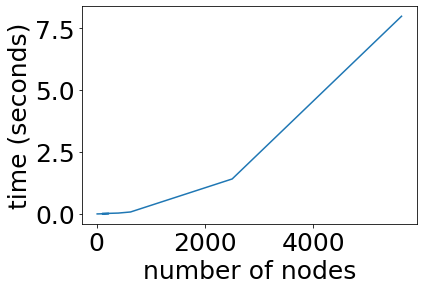

In [3]:
import joblib
import os
import re
import numpy as np

pat = re.compile("optimize_score_n_nodes_(\d*).jbl")
filenames = !ls results
times = []
for filename in filenames:
    n_nodes = int(pat.match(filename).group(1))
    results = joblib.load(os.path.join("results" , filename))
    times.append((n_nodes, results[0]))
times = np.array(times)

sort_ind = np.argsort(times[:,1])
times = times[sort_ind]

import matplotlib.pyplot as plt
plt.plot(times[:,0], times[:,1])
plt.xlabel("number of nodes")
plt.ylabel("time (seconds)")
plt.rcParams["font.size"] = 25